# Autoencoders, GANs, Diffusion Models


#### Autoencoders

- Autoencoders learn dense representations of input data = *latent representations* or *codings*
- Latent representations have lower dimensionality
- Can use for dimensionality reduction, pretraining of dense neural networks
- Some are *generative*: Can randomly generate new data similar to training data
---

#### Generative adversarial networks

- Generator creates fake data from random latent representations
- Discriminator tries to tell fake from real
- Training in 2 steps

#### Diffusion models

- Forward process: Add Guassian noise
- Reverse: Gradually remove noise
- Can generate new images from noise

*Largely Adopted from Chapter 18 of Geron.*


In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

## Autoencoders: Efficient Data Representation

- Input = Output
- Memorization task
- Force autoencoder to find patterns in the data!

Architecture:

1. Encoder: Convert input to latent representation
2. Decoder: Convert latent representation to output

### Example of Chess

- Chess masters much better at memorizing board positions
- Only if result of actual play, cannot just be random

<img src="latent.png" alt="Chess" style="width:450px;"/>

<img src="latent2.png" alt="Chess" style="width:450px;"/>

From Frey, P. W., & Adesman, P. (1976). Recall memory for visually presented chess positions. Memory & Cognition, 4, 541-547.

## Autoencoder for Dimensionality Reduction/PCA

- Use lower dimensionality for internal representation than input data = *undercomplete* autoencoder
- Use linear activation functions and MSE as cost function: Yields PCA

Create linear autoencoder to go from two to one dimensions for latent representation:

In [4]:
##Note no activation functions, just linear:
encoder = tf.keras.Sequential([tf.keras.layers.Dense(1)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(2)])

#Stack encoder/decoder
autoencoder = tf.keras.Sequential([encoder, decoder])

#Compile as per the usual
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
autoencoder.compile(loss='mse',
                    optimizer=optimizer)

In [5]:
### Make some data:
from scipy.stats import multivariate_normal

#Number of samples:
N = 500

#Covariance matrix:
sig1 = 1; sig2 = 2; rho=.9
cov = [[sig1**2, rho*sig1*sig2],
       [rho*sig1*sig2, sig2**2]]

#Set our means:
means = [0, 0]

#And get our sample, size N:
y = multivariate_normal(cov = cov, mean = means)
X = y.rvs(size = N)


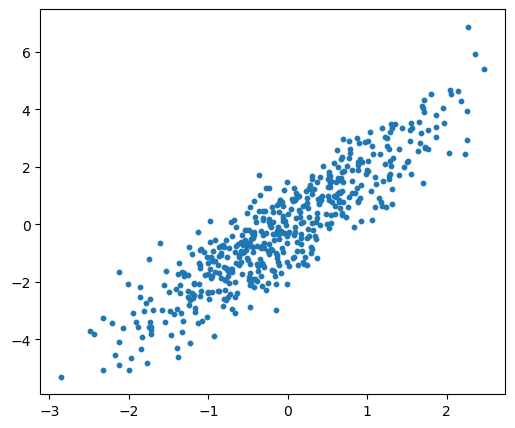

In [7]:
#Plot:
fig, ax1 = plt.subplots(1,1, figsize=(6, 5))

ax1.scatter(X[:,0], X[:,1], s=10);

In [8]:
### Train: Input = Output
history = autoencoder.fit(X, X, epochs=100, verbose=False)

In [9]:
## Latent representations:
codings = encoder.predict(X)

16/16 [==============================] - 0s 667us/step


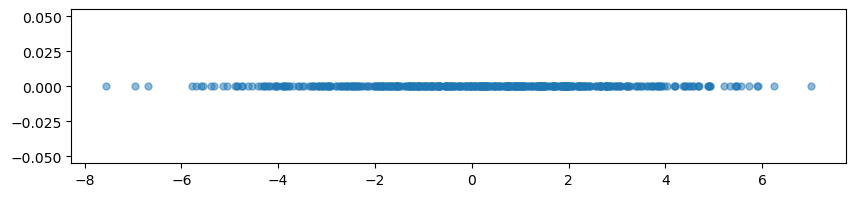

In [12]:
#Plot codings/latent representation:
#######

fig, ax1 = plt.subplots(1,1, figsize=(10, 2))

ax1.plot(codings, np.zeros(N), '.', markersize=10, alpha=.5);

16/16 [==============================] - 0s 600us/step


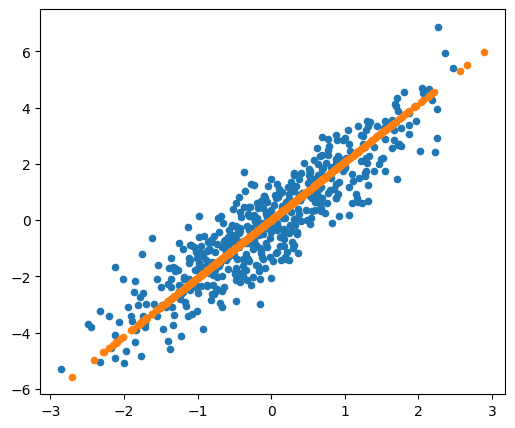

In [14]:
### And result of autoencoding?
#########

X_auto = autoencoder.predict(X)

#Plot:
fig, ax1 = plt.subplots(1,1, figsize=(6, 5))

ax1.scatter(X[:,0], X[:,1], s=20);
ax1.scatter(X_auto[:,0], X_auto[:,1], s=20);

In [15]:
### Could do same in 3D:
########

#Number of samples:
N = 500

#Covariance matrix:
cov = np.eye(3)

#Set our means:
means = [0, 0, 0]

#And get our sample, size N:
y = multivariate_normal(cov = cov, mean = means)
X = y.rvs(size = N)


A = np.array([[3, 1, 1],
              [1, 1, 2],
              [1, 1, 3]])

#And apply:
X = np.dot(A, X.T).T

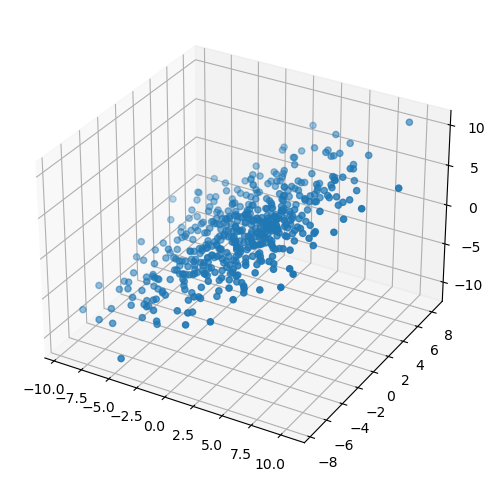

In [16]:
fig = plt.figure(figsize=(6,6))
ax1 = plt.axes(projection='3d')
ax1.scatter(X[:,0], X[:,1], X[:,2])

In [17]:
##Note no activation functions, just linear:
encoder = tf.keras.Sequential([tf.keras.layers.Dense(1)])
decoder = tf.keras.Sequential([tf.keras.layers.Dense(3)])

#Stack encoder/decoder
autoencoder = tf.keras.Sequential([encoder, decoder])

#Compile as per the usual
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
autoencoder.compile(loss='mse',
                    optimizer=optimizer)

In [18]:
### Train:
history = autoencoder.fit(X, X, epochs=100, verbose=False)

In [19]:
## Latent representations:
codings = encoder.predict(X)

16/16 [==============================] - 0s 600us/step


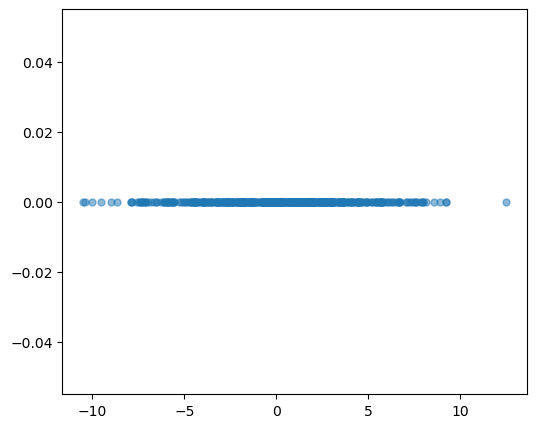

In [21]:
#Plot codings/latent representation:
#######

fig, ax1 = plt.subplots(1,1, figsize=(6, 5))

ax1.plot(codings[:,0], np.zeros(N), '.', markersize=10, alpha=.5);
#ax1.plot(codings[:,0], codings[:,1], '.', markersize=10, alpha=.5);


16/16 [==============================] - 0s 667us/step


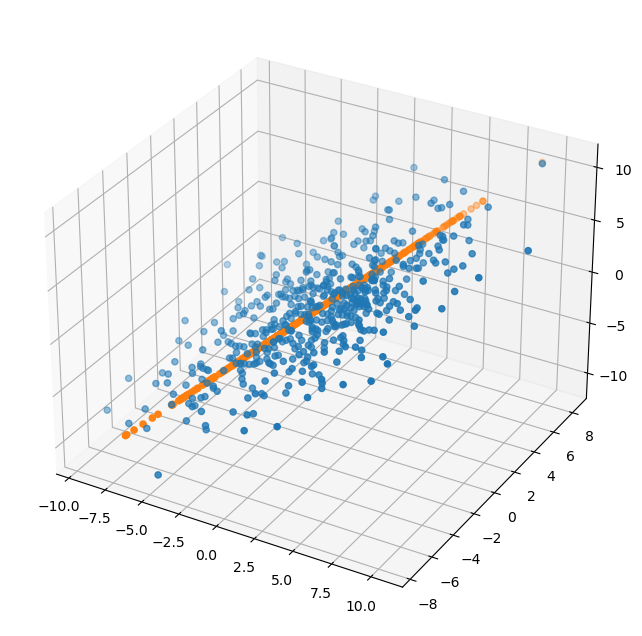

In [22]:
### And result of autoencoding?
#########

X_auto = autoencoder.predict(X)

#Plot:
fig = plt.figure(figsize=(8,8))
ax1 = plt.axes(projection='3d')

ax1.scatter(X[:,0], X[:,1], X[:,2], s=20);
ax1.scatter(X_auto[:,0], X_auto[:,1], X_auto[:,2], s=20);



#### A Nicer Example:

<img src="auto1.png" style="width:550px;"/>


## Get MNIST Fashion Data

- Grab the data for the rest of the notebook

In [23]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [24]:
#Vs. MNIST Numbers:
#from keras.datasets import mnist

#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
#Normalize to between 0 and 1:
train_images, test_images = train_images / 255.0, test_images / 255.0


In [26]:
## Hold out some for validation, yet again
###########

## All but last 5,000 will be train data; last 5,000 will be validation
X_train, y_train = train_images[:-5000], train_labels[:-5000]

X_valid, y_valid = train_images[-5000:], train_labels[-5000:]

#Rename the test data for consistency:
X_test, y_test = test_images, test_labels

In [27]:
#Our class names:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

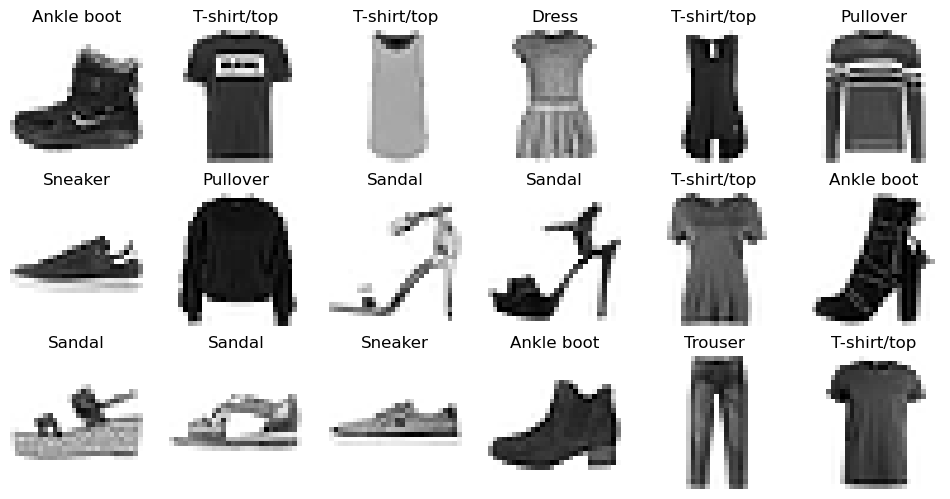

In [28]:
#Plot a few:
#####

fig1, ax1 = plt.subplots(3, 6, figsize=(12,8))

#Flatten for easier indexing
ax1 = ax1.flatten()

#And plot:
for i in range(18):
    im = ax1[i].imshow(X_train[i], cmap='gray_r')
    
    ax1[i].set_title(class_names[y_train[i]])
    ax1[i].set_axis_off()

## Stacked Autoencoders

<img src="auto2.png" style="width:400px;"/>

In [29]:
##Make a stacked autoencoder:
###########

#Encoder: Output gives codings
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])


#Decode the codings!
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(784),
    tf.keras.layers.Reshape([28, 28])
])

#Stack encoder and decoder:
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])


In [31]:
#Compile:
stacked_ae.compile(loss="mse", optimizer="nadam")                   


In [32]:
#And let's train on Fashion MNIST:
########

history = stacked_ae.fit(X_train, X_train, epochs=20,
                         validation_data=(X_valid, X_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0237 - val_loss: 0.0188
Epoch 2/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 3/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0169 - val_loss: 0.0168
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0164 - val_loss: 0.0165
Epoch 5/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0160 - val_loss: 0.0160
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0157 - val_loss: 0.0158
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0155 - val_loss: 0.0156
Epoch 8/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0153 - val_loss: 0.0154
Epoch 9/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0152 - val_loss: 0.0153
Epoch 10/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.015

#### How does it do on Reconstruction?

- Let's plot inputs and outputs

1/1 [==============================] - 0s 15ms/step


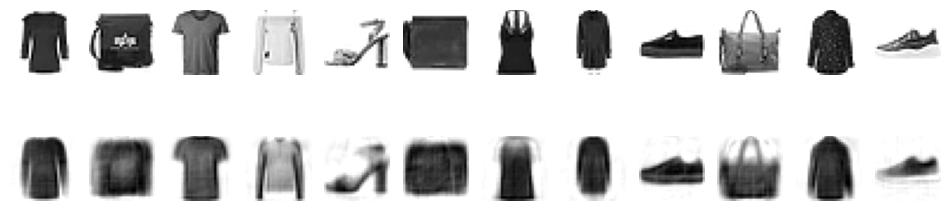

In [33]:
#### Plot outputs of autoencoder:
#########
fig1, ax1 = plt.subplots(2, 12, figsize=(12,3))

#And plot:
for i in range(12):

    ax1[0, i].imshow(X_valid[i], cmap='gray_r')
    ax1[0, i].set_axis_off()

    #And reconstruction:
    image = stacked_ae.predict(X_valid[i:i+1])
    
    #Can clip to 0, 1:
    image = np.clip(image, 0, 1)
    
    ax1[1, i].imshow(image.squeeze(), cmap='gray_r')
    ax1[1, i].set_axis_off()

### Use for Dimensionality Reduction:

- We can use the latent representations as reduced-dimension representations of inputs

- Reduce from 784 dimensions to 30, in this example

In [34]:
X_train_compressed = stacked_encoder.predict(X_train)

1719/1719 [==============================] - 1s 635us/step


In [35]:
##Try a random forest classifier on the reduced data (remember those?)

##Classifier training
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)

In [37]:
##And the fit:
clf.fit(X_train_compressed, y_train)

RandomForestClassifier(random_state=42)

In [38]:
## See how we do on test data:
X_test_compressed = stacked_encoder.predict(X_test)

y_pred = clf.predict(X_test_compressed)


313/313 [==============================] - 0s 654us/step


In [39]:
#Confusion matrix on 
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[817,   0,  16,  50,   2,   3,  96,   0,  16,   0],
       [  5, 945,   6,  34,   4,   0,   4,   0,   2,   0],
       [ 14,   0, 757,  14, 120,   0,  85,   0,  10,   0],
       [ 36,   3,   9, 878,  36,   0,  34,   0,   4,   0],
       [  1,   0, 132,  39, 754,   0,  67,   0,   7,   0],
       [  0,   0,   0,   0,   0, 915,   0,  59,   2,  24],
       [169,   1, 129,  36, 103,   1, 539,   0,  22,   0],
       [  0,   0,   0,   0,   0,  45,   0, 899,   0,  56],
       [  1,   0,   3,   8,   5,   4,   9,   5, 964,   1],
       [  0,   0,   0,   0,   0,  25,   0,  36,   1, 938]], dtype=int64)

In [50]:
##Overall accuracy?
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred, normalize=True)

0.8406

### Apply t-SNE?

In [51]:
#Add annotation: Fashion item, enforce minimum distance
########
def plot_fashion(X_reduced, X_sample, y_sample, do_images = True):
    from matplotlib.offsetbox import AnnotationBbox, OffsetImage

    #from sklearn.preprocessing import MinMaxScaler
    #from matplotlib.offsetbox import AnnotationBbox, OffsetImage

    fig1, ax1 = plt.subplots(1, 1, figsize=(16,14)) #, dpi=300)

    scatter = ax1.scatter(X_reduced[:,0], X_reduced[:,1], c=y_sample,
                          s=15, cmap='tab20') #, alpha=.5)

    ax1.set_axis_off()

    neighbors = np.array([[0., 0.]])
    min_distance = 10

    for index, image_coord in enumerate(X_reduced):

        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()

        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]

            if (not do_images):
                ax1.text(image_coord[0], image_coord[1], str(y_sample[index]),
                         color=np.array(my_cmap(float(y_sample[index]) / 9)),
                         fontweight='bold', fontsize=14,
                         bbox={'facecolor':'white','alpha':.9,'edgecolor':'black','pad':2},
                         ha='center', va='center')
            else:
                image = X_sample[index]
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord, pad=0, zorder=1)
                ax1.add_artist(imagebox)


In [52]:
from sklearn.manifold import TSNE

#Initialize our t-SNE model:
tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)

In [53]:
## Limit to 5000 samples for speed:
    
X_sample, y_sample = X_train[:5000], y_train[:5000]

CPU times: total: 1min 33s
Wall time: 11.7 s


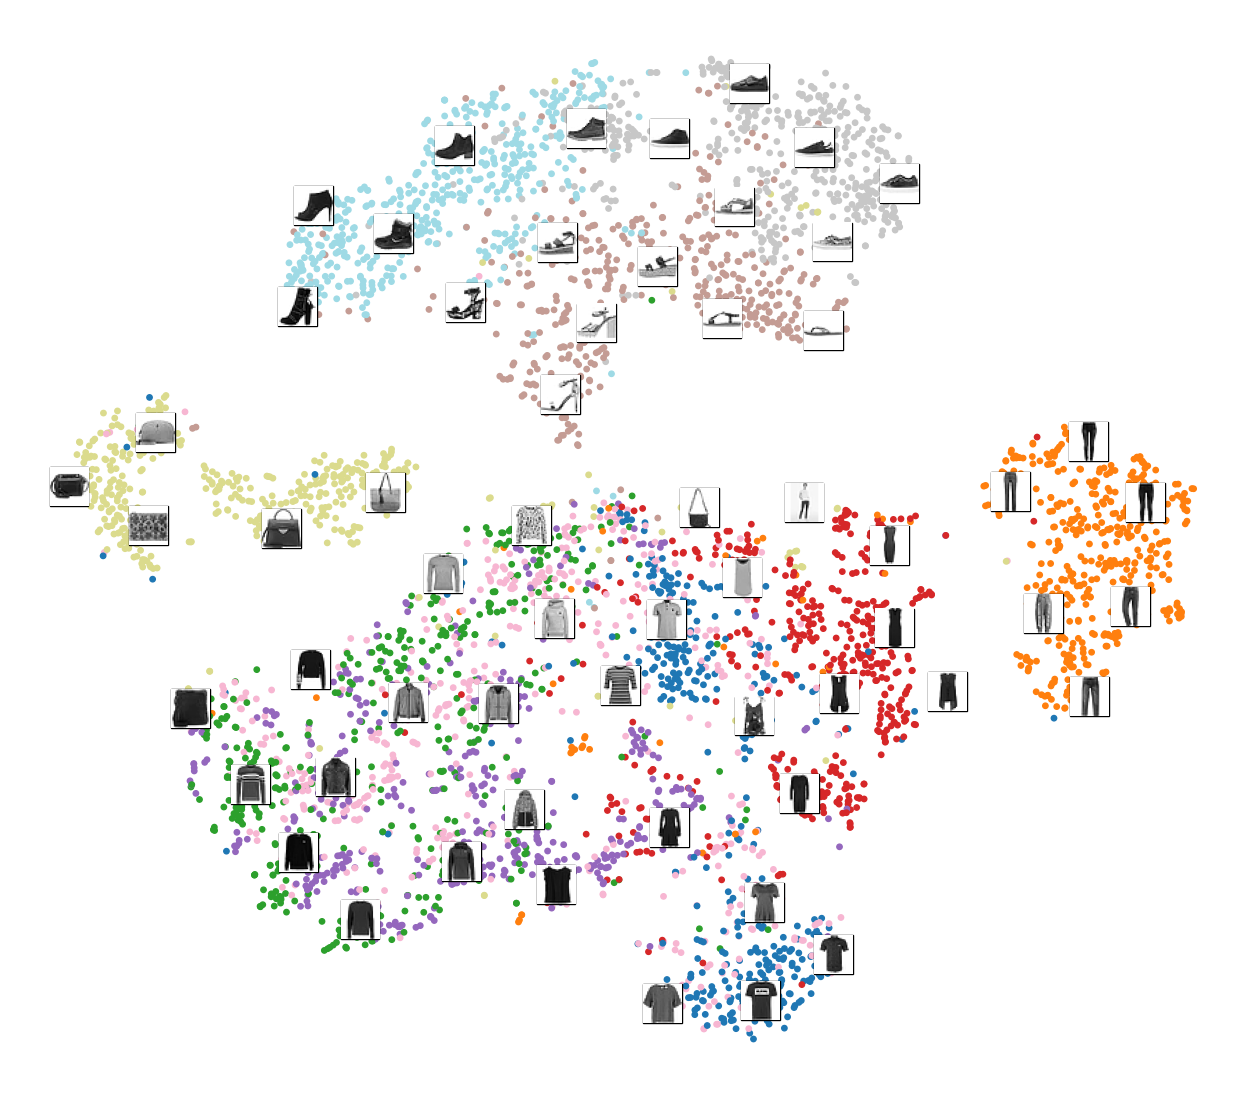

In [55]:
%%time
## Fit model on full dataset
X_reduced = tsne.fit_transform(X_sample.reshape(-1, 28*28))

#And plot results:
######
plot_fashion(X_reduced, X_sample, y_sample, do_images = True)

CPU times: total: 1min 24s
Wall time: 10.6 s


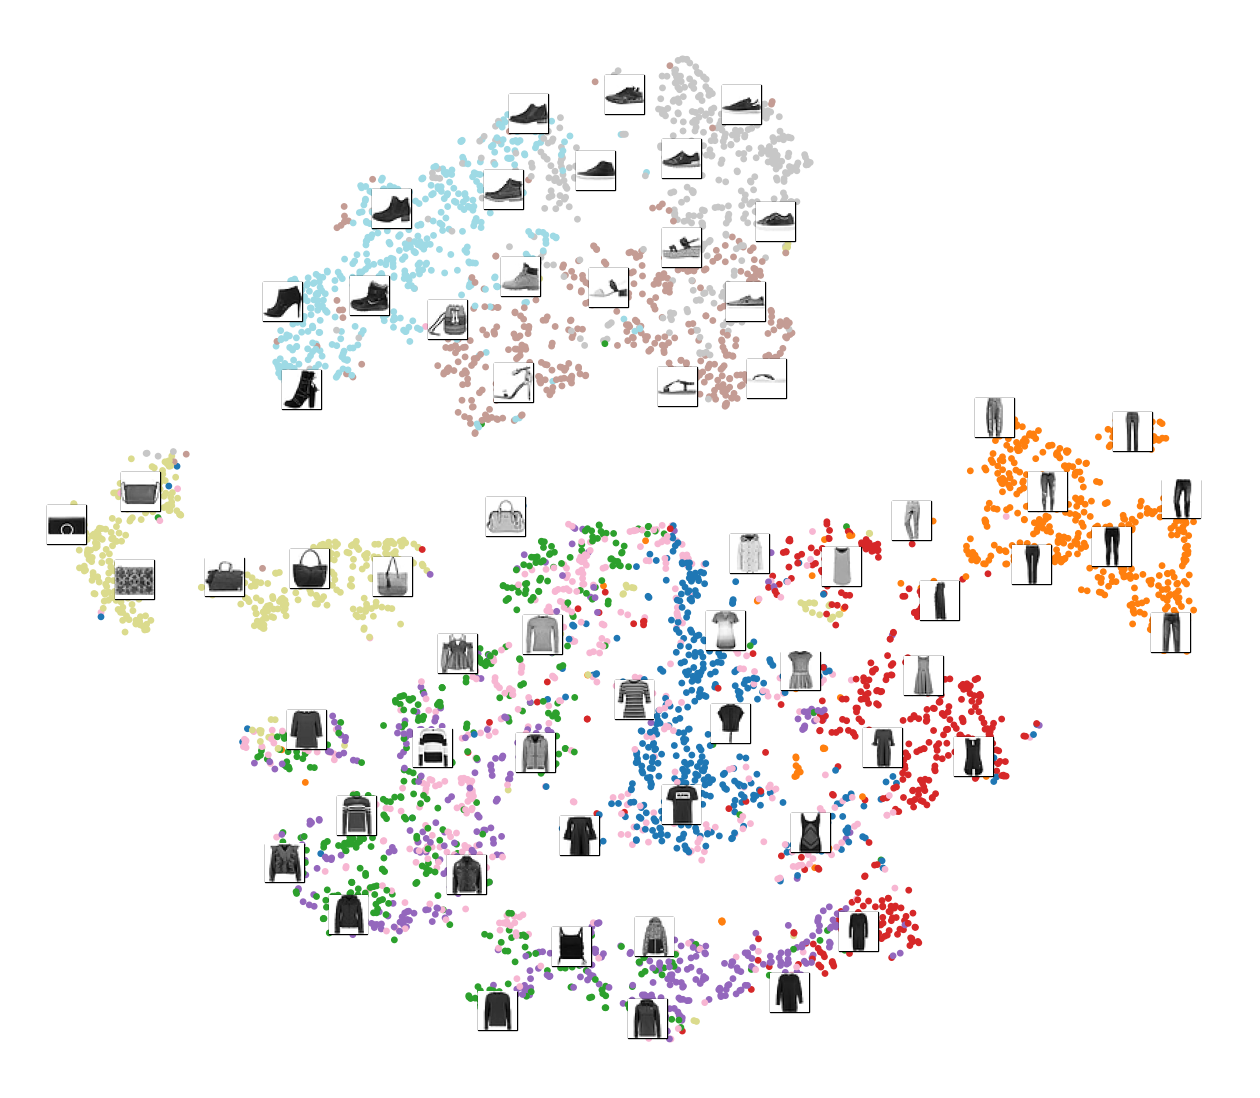

In [56]:
%%time
## Fit model on encoder results:
X_reduced = tsne.fit_transform(X_train_compressed[:5000])

#And plot results:
######
plot_fashion(X_reduced, X_sample, y_sample, do_images = True)

## Unsupervised Pretraining

- Same notion that we've already seen:

<img src="auto4.png" style="width:400px;"/>

## Convolutional Autoencoder

Consider the following convolutional autoencoder, including transpose convolutional layers for upsampling:

In [66]:
#Encoder:
conv_encoder = tf.keras.Sequential([
    tf.keras.layers.Reshape([28, 28, 1]),
    tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 14 × 14 x 16
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 7 × 7 x 32
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),  # output: 3 x 3 x 64
    
    tf.keras.layers.Conv2D(filters=30, kernel_size=3, padding="same", activation="relu"),
    tf.keras.layers.GlobalAvgPool2D()  # output: 30
])


conv_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(3 * 3 * 16),
    tf.keras.layers.Reshape((3, 3, 16)),
    
    tf.keras.layers.Conv2DTranspose(32, 3, strides=2, activation="relu"), #Output 7 x 7 x 32
    tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding="same", #Output 14 x 14 x 16
                                    activation="relu"),
    tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding="same"),  #Output 28 x 28 x 1
    tf.keras.layers.Reshape([28, 28])
])

conv_ae = tf.keras.Sequential([conv_encoder, conv_decoder])


In [67]:
#Compile
conv_ae.compile(loss="mse", optimizer="nadam")

In [68]:
#And fit:
history = conv_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 5ms/step - loss: 0.0296 - val_loss: 0.0207
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0189 - val_loss: 0.0177
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0167 - val_loss: 0.0161
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0155 - val_loss: 0.0152
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0147 - val_loss: 0.0145
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0141 - val_loss: 0.0142
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0136 - val_loss: 0.0138
Epoch 8/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0132 - val_loss: 0.0129
Epoch 9/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0129 - val_loss: 0.0127
Epoch 10/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0

1/1 [==============================] - 0s 15ms/step


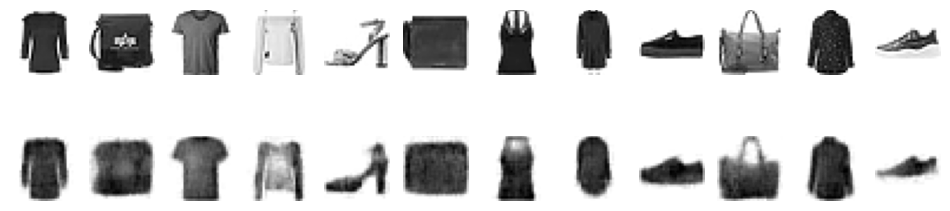

In [69]:
#### Plot outputs of autoencoder:
#########
fig1, ax1 = plt.subplots(2, 12, figsize=(12,3))

#And plot:
for i in range(12):

    ax1[0, i].imshow(X_valid[i], cmap='gray_r')
    ax1[0, i].set_axis_off()

    #And reconstruction:
    image = conv_ae.predict(X_valid[i:i+1])
    
    #Can clip to 0, 1:
    image = np.clip(image, 0, 1)
    
    ax1[1, i].imshow(image.squeeze(), cmap='gray_r')
    ax1[1, i].set_axis_off()

## Denoising Autoencoders

- Add noise, try to force autoencoder to recover original inputs
- Add Gaussian noise or Dropout
- Denoising will fill in missing information with a reasonable-looking hallucination

Simple example:

In [70]:
dropout_encoder = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu")
])

dropout_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(784),
    tf.keras.layers.Reshape([28, 28])
])

dropout_ae = tf.keras.Sequential([dropout_encoder, dropout_decoder])

In [72]:
#Compile and fit
dropout_ae.compile(loss="mse", optimizer="nadam")
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0297 - val_loss: 0.0227
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0228 - val_loss: 0.0203
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0213 - val_loss: 0.0194
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0206 - val_loss: 0.0188
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0201 - val_loss: 0.0184
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0197 - val_loss: 0.0181
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0195 - val_loss: 0.0179
Epoch 8/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0193 - val_loss: 0.0177
Epoch 9/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0191 - val_loss: 0.0175
Epoch 10/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.018

In [73]:
##Apply dropout to images:
dropout = tf.keras.layers.Dropout(0.5)
X_valid_dropout = dropout(X_valid, training=True)

1/1 [==============================] - 0s 16ms/step


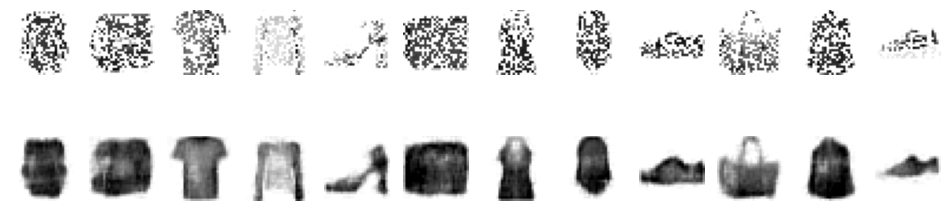

In [74]:
#Plot reconstructions of noisy inputs:
fig1, ax1 = plt.subplots(2, 12, figsize=(12,3))

#And plot:
for i in range(12):

    ax1[0, i].imshow(X_valid_dropout[i], cmap='gray_r')
    ax1[0, i].set_axis_off()

    #And reconstruction:
    image = conv_ae.predict(X_valid_dropout[i:i+1])
    
    #Can clip to 0, 1:
    image = np.clip(image, 0, 1)
    
    ax1[1, i].imshow(image.squeeze(), cmap='gray_r')
    ax1[1, i].set_axis_off()

## Variational Autoencoder

- *Probabalistic*
- *Generative*

<img src="auto3.png" style="width:300px;"/>

Notion:

- Instead of producing coding, produce *mean* coding $\mathbf{\mu}$ and standard deviation $\mathbf{\sigma}$
- Sample coding from Gaussian distribution with mean $\mathbf{\mu}$ and s.d. $\mathbf{\sigma}$
- Proceed through decoder as usual

During training:

- Cost function pushes codings to look as though sampled from simple Gaussian
- Codings in coding space look like Gaussian cloud

To generate:

- Sample coding from Gaussian, run decoder

#### Loss Function

Loss function is MSE plus KL divergence between Gaussian distribution and actual distribution of codings:

$$
L = -\frac{1}{2} \sum_{i=1}^n \left(1 + \log{\left(\sigma_i^2\right)} - \sigma_i^2 - \mu_i^2 \right)
$$

And using $\gamma = \log{(\sigma_i^2)}$

$$
L = -\frac{1}{2} \sum_{i=1}^n \left(1 + \gamma_i - \exp{(\gamma_i)} - \mu_i^2 \right)
$$


#### Let's Implement:

In [75]:
#Define a custom layer for sampling coding:
#Input is mean and the logarithm of sigma^2 = log_var

class Sampling(tf.keras.layers.Layer):

    def call(self, inputs):
        mean, log_var = inputs
        
        #Get a bunch of normals drawn from a distribution with given means and variances:
        return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [76]:
### Build encoder using functional API:
#######

codings_size = 10

#Input as usual:
inputs = tf.keras.layers.Input(shape=[28, 28])

#Z is result of flatting
Z = tf.keras.layers.Flatten()(inputs)

#And pass through 150 neuron dense layer
Z = tf.keras.layers.Dense(150, activation="relu")(Z)
#Another dnse layer:
Z = tf.keras.layers.Dense(100, activation="relu")(Z)

## Layer for means, no activation function:
codings_mean = tf.keras.layers.Dense(codings_size)(Z)  # mu = mean
codings_log_var = tf.keras.layers.Dense(codings_size)(Z)  # gamma = log_var

#Get codings from Sampling Layer:
codings = Sampling()([codings_mean, codings_log_var])

#Make the variational encoder:
variational_encoder = tf.keras.Model(inputs=[inputs],
                                    outputs=[codings_mean, codings_log_var, codings])

In [77]:
#Take a looksie:
variational_encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 flatten_2 (Flatten)         (None, 784)                  0         ['input_1[0][0]']             
                                                                                                  
 dense_17 (Dense)            (None, 150)                  117750    ['flatten_2[0][0]']           
                                                                                                  
 dense_18 (Dense)            (None, 100)                  15100     ['dense_17[0][0]']            
                                                                                              

In [78]:
#Only input we need is codings, of size codings_size
decoder_inputs = tf.keras.layers.Input(shape=[codings_size])

#Mirror architecture for decoder:
Z = tf.keras.layers.Dense(100, activation="relu")(decoder_inputs)
Z = tf.keras.layers.Dense(150, activation="relu")(Z)

Z = tf.keras.layers.Dense(784)(Z)
outputs = tf.keras.layers.Reshape([28, 28])(Z)

#The variational decoder:
variational_decoder = tf.keras.Model(inputs=[decoder_inputs],
                                     outputs=[outputs])

In [79]:
#Put it together into a complete model:
#######

#Only need codings from the encoder
codings_mean, codings_log_var, codings = variational_encoder(inputs)

#Our reconstruction from the decoder:
reconstructions = variational_decoder(codings)

#Total model:
variational_ae = tf.keras.Model(inputs=[inputs], outputs=[reconstructions])


In [80]:
variational_ae.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 model (Functional)          [(None, 10),              134870    
                              (None, 10),                        
                              (None, 10)]                        
                                                                 
 model_1 (Functional)        (None, 28, 28)            134634    
                                                                 
Total params: 269504 (1.03 MB)
Trainable params: 269504 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
## Must also add to loss term:
#######

latent_loss = -0.5 * tf.reduce_sum(
    1 + codings_log_var - tf.exp(codings_log_var) - tf.square(codings_mean),
    axis=-1)

variational_ae.add_loss(tf.reduce_mean(latent_loss) / 784.)


In [82]:
## Compile and fit as usual:
#####

variational_ae.compile(loss="mse", optimizer="nadam")

history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

Epoch 1/25
430/430 [==============================] - 4s 4ms/step - loss: 0.0507 - val_loss: 0.0386
Epoch 2/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0365 - val_loss: 0.0358
Epoch 3/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0347 - val_loss: 0.0346
Epoch 4/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0339 - val_loss: 0.0339
Epoch 5/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0333 - val_loss: 0.0334
Epoch 6/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0328 - val_loss: 0.0329
Epoch 7/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0326 - val_loss: 0.0327
Epoch 8/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0323 - val_loss: 0.0325
Epoch 9/25
430/430 [==============================] - 2s 4ms/step - loss: 0.0321 - val_loss: 0.0323
Epoch 10/25
430/430 [==============================] - 1s 3ms/step - loss: 0.0320 - val_loss: 0.0322

1/1 [==============================] - 0s 15ms/step


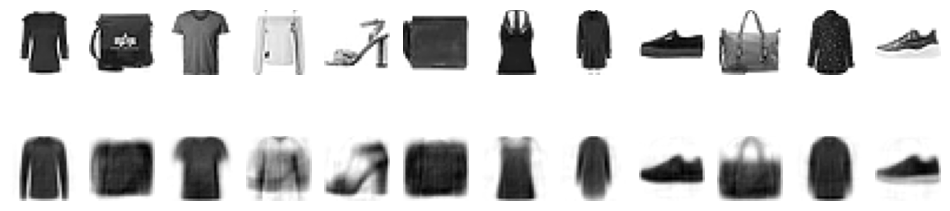

In [83]:
#### Plot some outputs of this here variational autoencoder:
#########
fig1, ax1 = plt.subplots(2, 12, figsize=(12,3))

#And plot:
for i in range(12):

    im = ax1[0, i].imshow(X_valid[i], cmap='gray_r')
    ax1[0, i].set_axis_off()

    #And reconstruction:
    image = variational_ae.predict(X_valid[i:i+1])
    
    #Can clip to 0, 1:
    image = np.clip(image, 0, 1)
    
    ax1[1, i].imshow(image.squeeze(), cmap='gray_r')
    ax1[1, i].set_axis_off()

#### Now make some codings!

In [84]:
#Get our means and variances for the train set:
######

codings_mean, codings_log_var, codings = variational_encoder(X_train)

In [85]:
means = np.mean(codings_mean, axis=0)

In [86]:
sd = np.sqrt(np.mean(np.exp(codings_log_var), axis=0))

In [87]:
codings = np.zeros([36, codings_size])

codings[:,7] = np.linspace(-2, 2, 36)

In [88]:
codings = np.random.normal(0, 1, size=[36, codings_size])

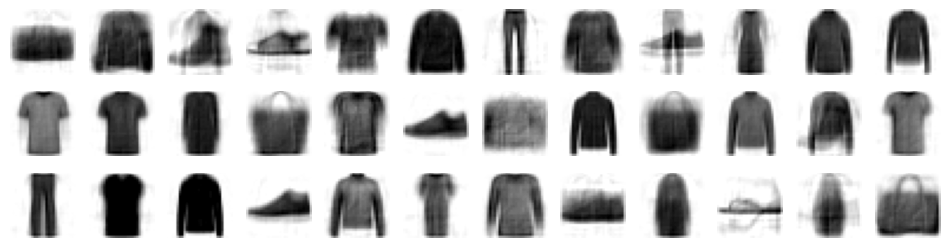

In [89]:
#### Plot outputs of this here variational autoencoder:
#########
fig1, ax1 = plt.subplots(3, 12, figsize=(12,3))
ax1 = ax1.flatten()
#And plot:
for i in range(36):

    #Apply decoder model:
    image = variational_decoder(codings).numpy()
    
    #Can clip to 0, 1:
    image = np.clip(image, 0, 1)
    
    ax1[i].imshow(image[i,:,:].squeeze(), cmap='gray_r')
    ax1[i].set_axis_off()

## Generative Adversarial Networks

- Paper by Goodfellow et al. (2014)

- Notion is that two networks compete: One is the generator, other is the discriminator

**Generator**: Takes random (Gaussian) input and outputs an image or other data. Random inputs = codings/latent representations. 

**Discriminator**: Takes either fake image from generator or real image from training set, guess if real or fake.

Generator tries to trick discriminator during training: make images real enough to be labelled real.

Training divided into two phases:

1. Train discriminator: Sample equal-sized batches of real and fake images (from generator). Label real as 1 and fake as 0. Use good old binary cross-entropy as loss term for this binary classifier. Weights of discriminator are trained in this phase.

2. Train generator: Generate batch of fake images; discriminator predicts to be fake or real. Set label for all fake images to 1. That is, we pretend the images are real, and the more are labelled as real, the better we did.

Can build as follows (Geron, 2023):

In [90]:
#Dimensions for latent representations:
codings_size = 30

generator = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(784, activation="sigmoid"),
    tf.keras.layers.Reshape([28, 28])
])


In [91]:

#Just a simple classifier that mirrors structure of generator:
####

discriminator = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(150, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


In [92]:
#Put together for model:
gan = tf.keras.Sequential([generator, discriminator])

In [93]:
#gan and discriminator are both binary classifiers

#Compile our discriminator and set trainable to False:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False

#And compile the GAN:
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [94]:
#gan has two layers:
gan.layers

In [95]:
##Make a dataset divided into mini-batches:
batch_size = 32

X_train = X_train.astype(np.float32)
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(buffer_size=1000)

dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

1/1 [==============================] - 0s 90ms/step


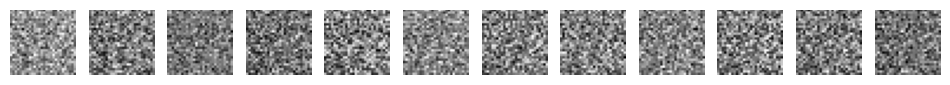

In [96]:
#Use the un-trained generator to make some fake images
noise = tf.random.normal(shape=[batch_size, codings_size])

fake_images = generator.predict(noise)

#### Plot outputs of this here variational autoencoder:
#########
fig1, ax1 = plt.subplots(1, 12, figsize=(12,3))
#And plot:
for i in range(12):

    ax1[i].imshow(fake_images[i,:,:].squeeze(), cmap='gray_r')
    ax1[i].set_axis_off()

In [99]:
###Training Loop
#######

def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    
    for epoch in range(n_epochs):
        
        #Iterate through each mini-batch:
        for X_batch in dataset:

            #Train the discriminator:
            #We sample from Gaussian noise for the codings
            #Use these to generate fake images:
            noise = tf.random.normal(shape=[batch_size, codings_size])

            fake_images = generator(noise)

            #Concatenate the fake_images and real images: X_batch
            X_fake_and_real = tf.concat([fake_images, X_batch], axis=0)
            
            #0s for fake; 1s for real:
            y_fake_and_real = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)
            
            #And now train the discriminator on the batch:
            #######
            #Note that this will still train discriminator even though we set trainable=False
            discriminator.train_on_batch(X_fake_and_real, y_fake_and_real)
            
            
            #Now train the generator:
            #Make some more noise
            noise = tf.random.normal(shape=[batch_size, codings_size])

            #Will train the overall gan, using the noise as input:
            #Because the discriminator isn't trained in this step, trains weights of generator to make
            #images more likely to be classed as 1s
            y_all_ones = tf.constant([[1.0]] * batch_size)
            gan.train_on_batch(noise, y_all_ones)
            
        print(epoch)

In [102]:
#Now train!
train_gan(gan, dataset, batch_size, codings_size, n_epochs=2)

0
1


2/2 [==============================] - 0s 2ms/step


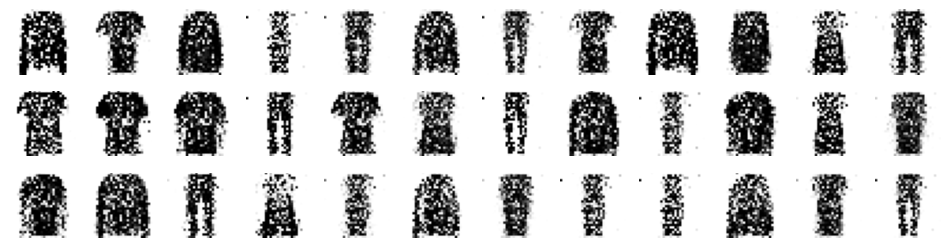

In [103]:
#Use the trained generator to make some fake images
noise = tf.random.normal(shape=[36, codings_size])

fake_images = generator.predict(noise)

#### Plot outputs of this here variational autoencoder:
#########
fig1, ax1 = plt.subplots(3, 12, figsize=(12,3))
ax1 = ax1.flatten()

#And plot:
for i in range(36):

    ax1[i].imshow(fake_images[i,:,:].squeeze(), cmap='gray_r')
    ax1[i].set_axis_off()

### Problem: Mode Collapse

- Generator happens to get good at fooling discriminator with one class, e.g. pants
- Starts to only produce only pants
- After a while discriminator gets good at distinguishing pants from non-pants, but forgets about other classes
- Generator starts to specialize in, e.g., shoes
- Cycle continues, GAN cycles through multiple classes, never getting good at anything

### Deep Convolutional GAN

- Example:

In [104]:
codings_size = 100

generator_cnn = tf.keras.Sequential([
    tf.keras.layers.Dense(7 * 7 * 128),
    tf.keras.layers.Reshape([7, 7, 128]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2,
                                    padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2,
                                    padding="same", activation="tanh"),
])


In [105]:
discriminator_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=tf.keras.layers.LeakyReLU(0.2)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [445]:
#Overall Model:
gan_cnn = tf.keras.Sequential([generator_cnn, discriminator_cnn])

In [446]:
#Similar compilation:
discriminator_cnn.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator_cnn.trainable = False

gan_cnn.compile(loss="binary_crossentropy", optimizer="rmsprop")


In [448]:
#Since last layer of generator uses tanh, outputs range -1 to 1
#Rescale our training data to -1 to 1
#Also adda a channel dimension:

X_train_cnn = X_train.reshape(-1, 28, 28, 1) * 2. - 1.


In [449]:
#Remake the dataset:
batch_size = 32
dataset_cnn = tf.data.Dataset.from_tensor_slices(X_train_cnn)
dataset_cnn = dataset_cnn.shuffle(1000)

dataset_cnn = dataset_cnn.batch(batch_size, drop_remainder=True).prefetch(1)


In [450]:
train_gan(gan_cnn, dataset_cnn, batch_size, codings_size, n_epochs=1)

0


2/2 [==============================] - 0s 3ms/step


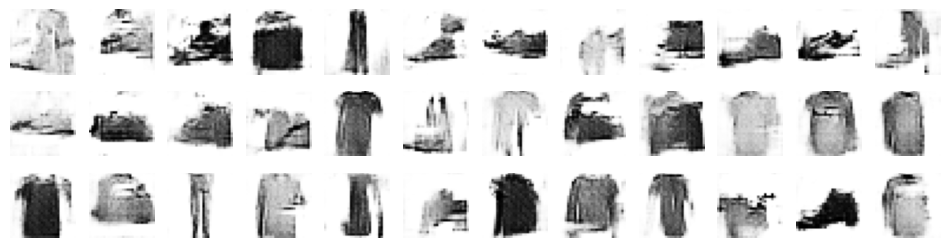

In [451]:
#And again, some results:
noise = tf.random.normal(shape=[36, codings_size])

fake_images = generator_cnn.predict(noise)

#### Plot outputs of this here variational autoencoder:
#########
fig1, ax1 = plt.subplots(3, 12, figsize=(12,3))
ax1 = ax1.flatten()

#And plot:
for i in range(36):

    ax1[i].imshow(fake_images[i,:,:].squeeze(), cmap='gray_r')
    ax1[i].set_axis_off()

## Style-GAN

- Karras et al. (2018)
<img src="style_gan.png" style="width:600px;"/>

## Diffusion Models

- Notion: Reverse a diffusion process

- Example, drop milk into tea, it diffuses. Learn to unmix the milk.

- *Denoising Diffusion Probabilistic Model* (DDPM)

***Stable Diffusion.*** See:

- https://keras.io/guides/keras_cv/generate_images_with_stable_diffusion/
 
- https://arxiv.org/abs/2305.03509

In [453]:
import keras_cv

Using TensorFlow backend


In [454]:
model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


In [457]:
images = model.text_to_image("photograph of an astronaut riding a horse", batch_size=3)


50/50 [==============================] - 978s 19s/step


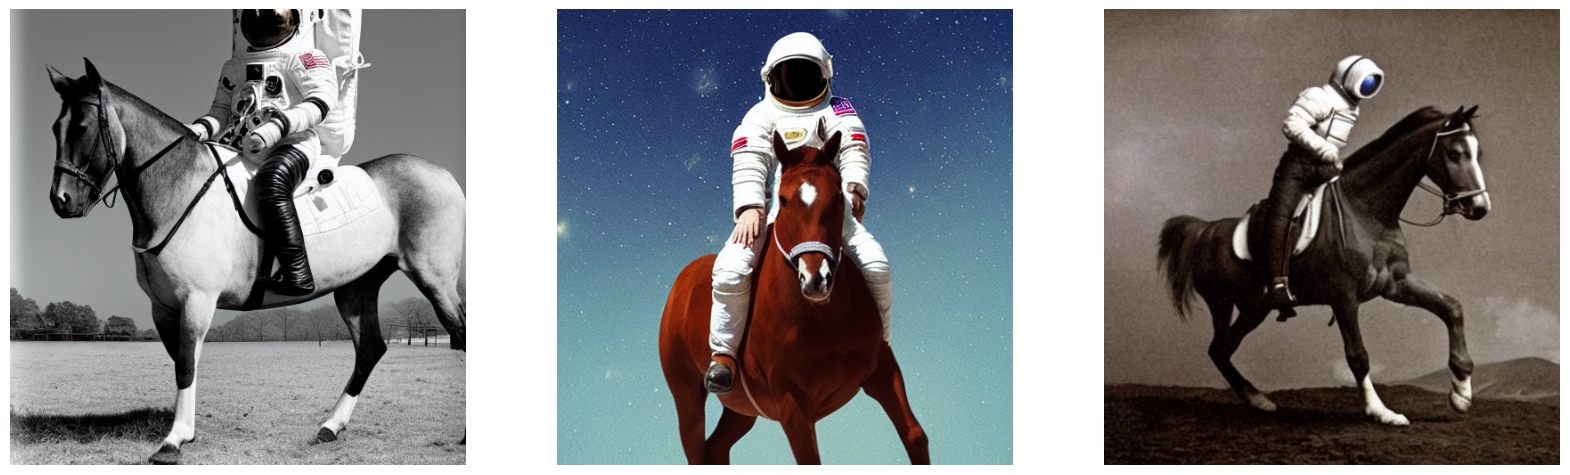

In [458]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

plot_images(images)